In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

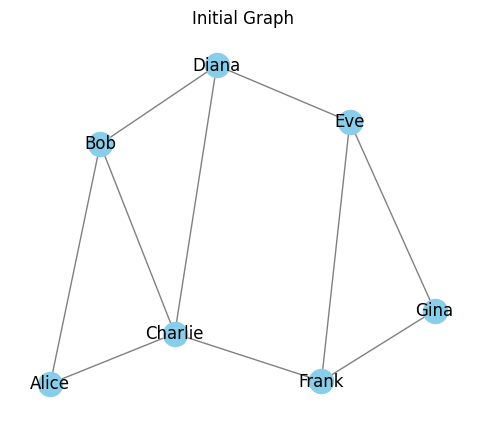

In [2]:
G = nx.Graph()
edges = [
    ("Alice", "Bob"),
    ("Alice", "Charlie"),
    ("Bob", "Charlie"),
    ("Bob", "Diana"),
    ("Charlie", "Diana"),
    ("Diana", "Eve"),
    ("Eve", "Frank"),
    ("Frank", "Gina"),
    ("Eve", "Gina"),
    ("Charlie", "Frank")
]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(6, 5))
nx.draw_networkx(G, pos, with_labels=True, node_color="skyblue", edge_color="gray")
plt.title("Initial Graph")
plt.axis('off')
plt.show()


In [3]:
def label_propagation_and_visualize(graph, max_iter=10, layout=None, pause=1.0):
    if layout is None:
        layout = nx.spring_layout(graph, seed=42)

    labels = {node: i for i, node in enumerate(graph.nodes())}

    for iteration in range(max_iter):
        new_labels = {}

        for node in graph.nodes():
            neighbor_labels = [labels[nb] for nb in graph.neighbors(node)]
            if not neighbor_labels:
                new_labels[node] = labels[node]
                continue

            freq = {}
            for lbl in neighbor_labels:
                freq[lbl] = freq.get(lbl, 0) + 1

            max_count = max(freq.values())
            candidates = [lbl for lbl, count in freq.items() if count == max_count]

            chosen_label = random.choice(candidates)
            new_labels[node] = chosen_label

        changed = False
        for node in graph.nodes():
            if labels[node] != new_labels[node]:
                changed = True
                break

        labels = new_labels

        unique_labels = list(set(labels.values()))
        unique_labels.sort()

        color_map = {}
        for idx, lbl in enumerate(unique_labels):
            color_map[lbl] = idx

        node_colors = [color_map[labels[node]] for node in graph.nodes()]

        plt.figure(figsize=(6, 5))
        nx.draw_networkx(
            graph, layout,
            with_labels=True,
            node_color=node_colors,
            cmap=plt.cm.Set3,
            edge_color="gray"
        )

        plt.title(f"Label Propagation - Iteration {iteration}")
        plt.axis('off')
        plt.show()


        # If no labels changed, we've converged
        if not changed:
            print(f"Converged at iteration {iteration}")
            break

    return labels


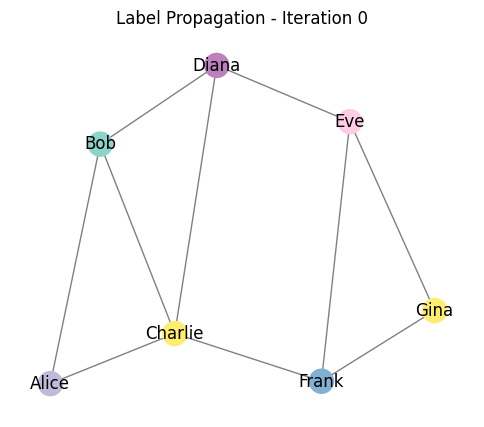

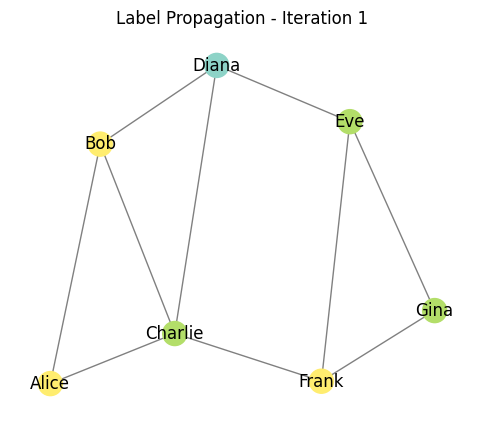

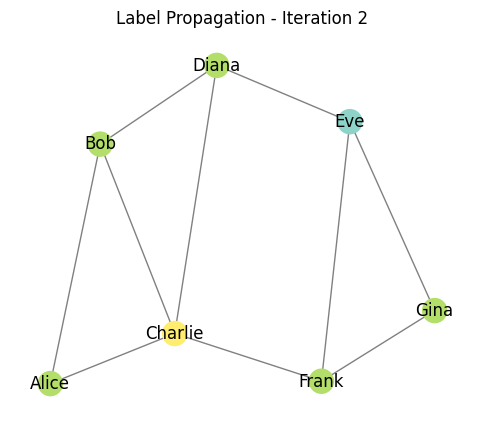

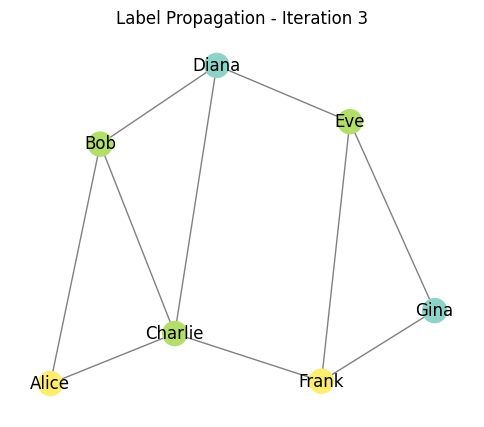

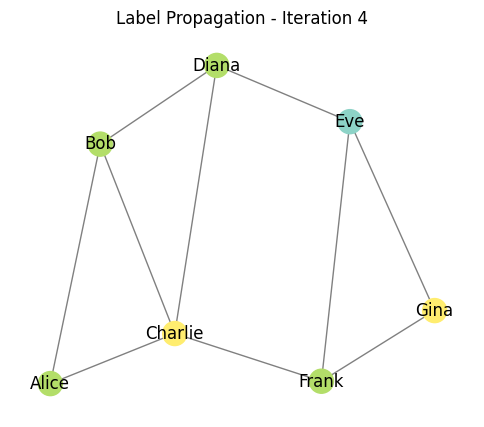

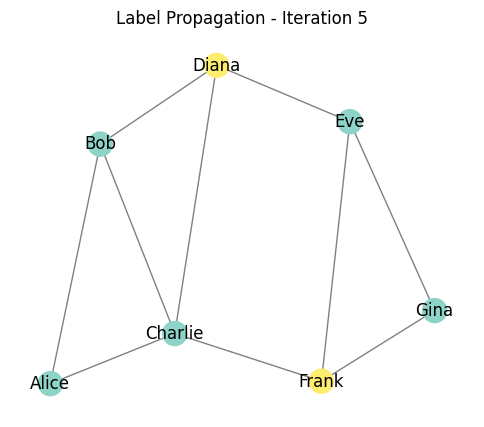

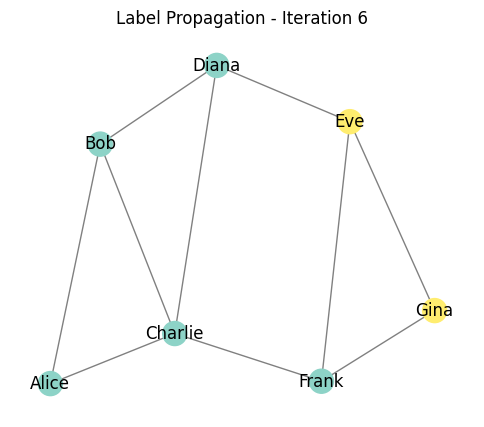

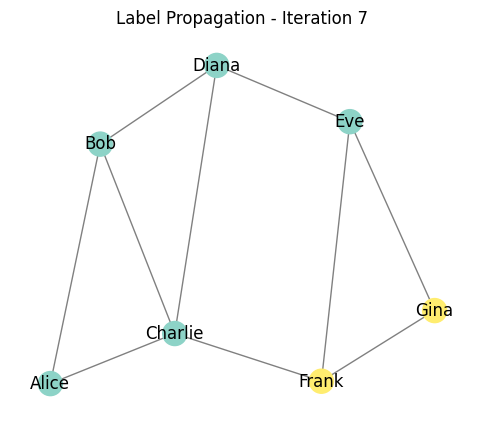

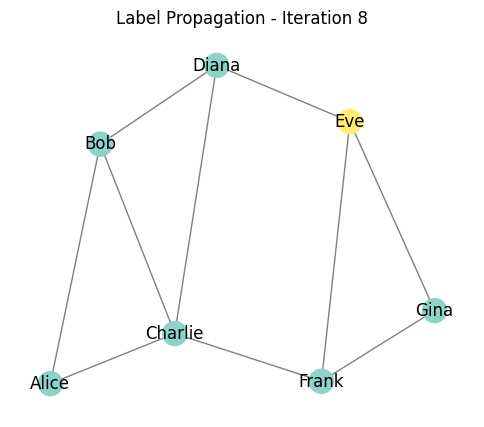

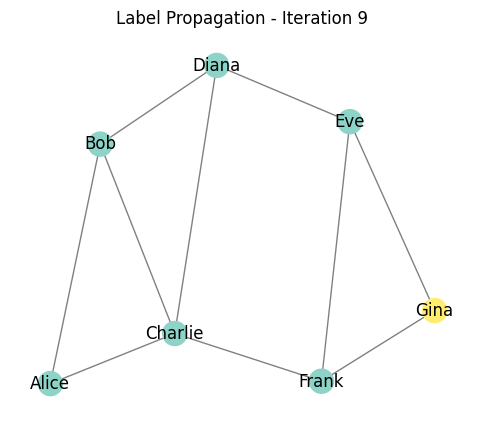

Final Labels:
Alice: 2
Bob: 2
Charlie: 2
Diana: 2
Eve: 2
Frank: 2
Gina: 5


In [4]:
final_labels = label_propagation_and_visualize(G, max_iter=10, layout=pos, pause=1.0)
print("Final Labels:")
for node, lbl in final_labels.items():
    print(f"{node}: {lbl}")